In [9]:
import numpy as np 
import matplotlib.pyplot as plt 

positive_data = [[-0.494,0.363],
                 [-0.311,-0.101],
                 [-0.0064,0.374],
                 [-0.0089,-0.173],
                 [0.0014,0.138],
                 [-0.189,0.718],
                 [0.085,0.32208],
                 [0.171,-0.302],
                 [0.142,0.568]]

negative_data =[[0.491,0.920],
                [-0.892,-0.946],
                [-0.721,-0.710],
                [0.519,-0.715],
                [-0.775,0.551],
                [-0.646,0.773],
                [-0.803,0.878],
                [0.944,0.801],
                [0.724,-0.795],
                [-0.748,-0.853],
                [-0.635,-0.905]]

Y_pos = [1]*9    #9 is the lenght of positive_data
Y_neg = [-1]*11  #11 is the length of negative_data

pos_X1 = [i[0] for i in positive_data]
pos_X2 = [i[1] for i in positive_data]

neg_X1 = [i[0] for i in negative_data]
neg_X2 = [i[1] for i in negative_data]


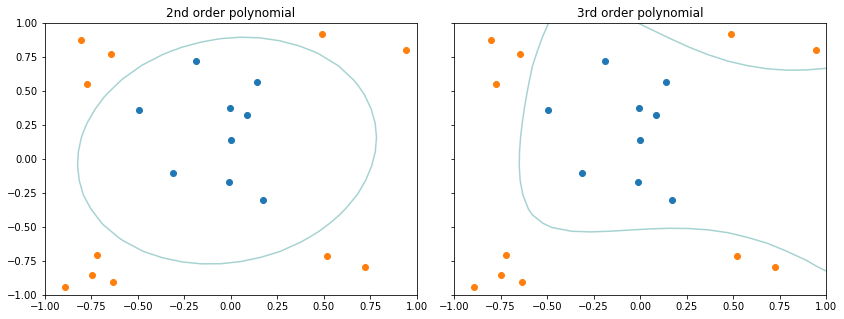

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures 

X = positive_data + negative_data
Y = Y_pos + Y_neg

lin2 = LinearRegression()
lin3 = LinearRegression()

poly2 = PolynomialFeatures(degree = 2) 
poly3 = PolynomialFeatures(degree = 3)

X_poly2 = poly2.fit_transform(X) 
X_poly3 = poly3.fit_transform(X)

lin2.fit(X_poly2,Y)
lin3.fit(X_poly3,Y)


xx1, xx2 = np.meshgrid(np.linspace(-1.0, 1.0, 20), 
                       np.linspace(-1.0, 1.0, 20))

D = np.c_[xx1.ravel(), xx2.ravel()]
D_poly2 = poly2.fit_transform(D)
D_poly3 = poly3.fit_transform(D)

Z2 = lin2.predict(D_poly2)
Z3 = lin3.predict(D_poly3)

Z2 = Z2.reshape(xx1.shape)
Z3 = Z3.reshape(xx1.shape)

fig,ax = plt.subplots(1,2,sharex='col', sharey='row', figsize=(14, 5))

ax[0].scatter(pos_X1,pos_X2)
ax[0].scatter(neg_X1,neg_X2)
ax[1].scatter(pos_X1,pos_X2)
ax[1].scatter(neg_X1,neg_X2)

ax[0].contour(xx1,xx2,Z2,0,alpha=0.4)
ax[1].contour(xx1,xx2,Z3,0,alpha=0.4)

ax[0].set_title('2nd order polynomial') 
ax[1].set_title('3rd order polynomial') 
plt.subplots_adjust(wspace = .1)
plt.show() 

4.b) The part on the right, 3rd order polynomial feature transform, appears to be overfitted.

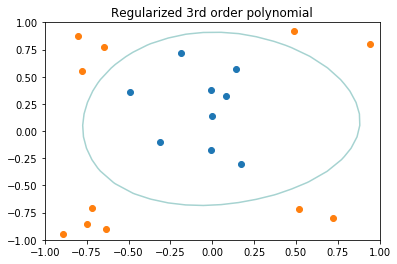

In [11]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha = 1)
ridge_reg.fit(X_poly3,Y)

Z = ridge_reg.predict(D_poly3)
Z = Z.reshape(xx1.shape)

plt.scatter(pos_X1,pos_X2)
plt.scatter(neg_X1,neg_X2)
plt.contour(xx1,xx2,Z,0,alpha=0.4)
plt.title('Regularized 3rd order polynomial')
plt.show() 

After regularization, 3rd order looks more like 2nd order polynomial feature, which is expected.

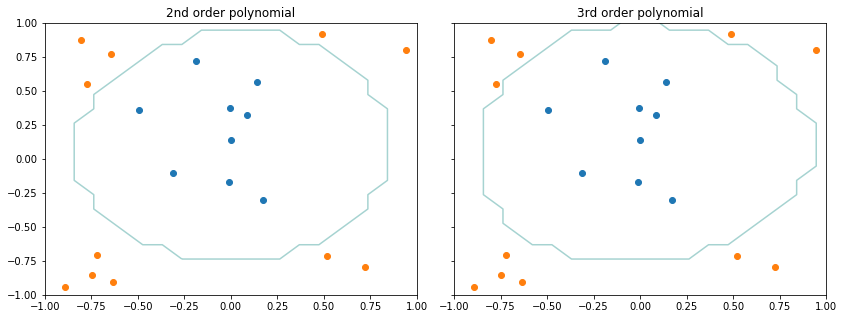

In [12]:
from sklearn.svm import SVC

svm_p2 = SVC(kernel='poly', C=1, gamma='auto', degree=2, coef0=1)
svm_p3 = SVC(kernel='poly', C=1, gamma='auto', degree=3, coef0=1)

svm_p2.fit(X_poly2,Y)
svm_p3.fit(X_poly3,Y)

Z2 = svm_p2.predict(D_poly2)
Z3 = svm_p3.predict(D_poly3)

Z2 = Z2.reshape(xx1.shape)
Z3 = Z3.reshape(xx1.shape)

fig,ax = plt.subplots(1,2,sharex='col', sharey='row', figsize=(14, 5))

ax[0].scatter(pos_X1,pos_X2)
ax[0].scatter(neg_X1,neg_X2)
ax[1].scatter(pos_X1,pos_X2)
ax[1].scatter(neg_X1,neg_X2)

ax[0].contour(xx1,xx2,Z2,0,alpha=0.4)
ax[1].contour(xx1,xx2,Z3,0,alpha=0.4)

ax[0].set_title('2nd order polynomial') 
ax[1].set_title('3rd order polynomial') 
plt.subplots_adjust(wspace = .1)
plt.show() 


4.d) Two SVM classifiers above very similar to each other and close to the Linear Regression Classifier with 2nd order or regularized 3rd order polynomial feature transform. Since SVM is inherently regularized, the result for 3rd order polynomial kernel is similar to 2nd order polynomial kernel.